## Load Python Packages and Data

In [2]:
# prompt: load statsmodels package to build logistic regression model

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# prompt: read heart.csv data file

import pandas as pd

# Assuming 'heart.csv' is in the same directory as your notebook
df = pd.read_csv('statlog_heart.csv')

# Print some info to check if it's loaded correctly
print(df.head())
print(df.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  presence  
0    2.0  3.0   3.0         2  
1    2.0  0.0   7.0         1  
2    1.0  0.0   7.0         2  
3    2.0  1.0   7.0         1  
4    1.0  1.0   3.0         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   c

## Familiarize with Data and Perform Data Cleansing

In [4]:
# prompt: what are the unique values in presence field

unique_presence_values = df['presence'].unique()
print(unique_presence_values)

[2 1]


In [5]:
# prompt: change column name of presence field to 'target'

df = df.rename(columns={'presence': 'target'})

In [6]:
# prompt: change all target values from 1 to 0

# Change all target values from 1 to 0
df['target'] = df['target'].replace(1, 0)


# Change all target values from 2 to 1
df['target'] = df['target'].replace(2, 1)

# Print the updated DataFrame
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  target  
0    2.0  3.0   3.0       1  
1    2.0  0.0   7.0       0  
2    1.0  0.0   7.0       1  
3    2.0  1.0   7.0       0  
4    1.0  1.0   3.0       0  


In [17]:
# prompt: Display top 10 rows with target and sex columns

print(df[['target', 'sex']].head(10))

   target  sex
0       1  1.0
1       0  0.0
2       1  1.0
3       0  1.0
4       0  0.0
5       0  1.0
6       1  1.0
7       1  1.0
8       1  1.0
9       1  0.0


## Visualize Data

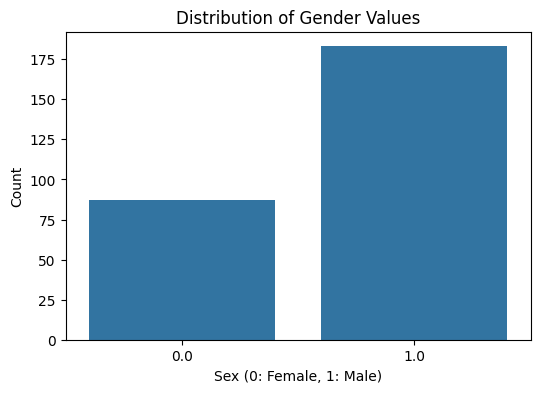

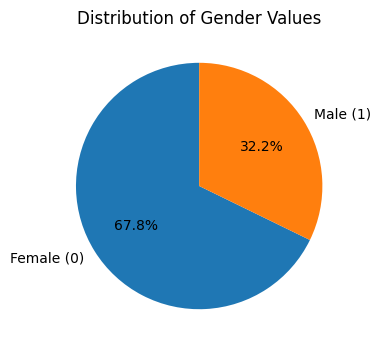

In [13]:
# prompt: Visualize the distribution of sex values in the dataset where 0 is Female and 1 is Male

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sex value
sex_counts = df['sex'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender Values')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Alternatively, you can use a pie chart:
plt.figure(figsize=(6, 4))
plt.pie(sex_counts, labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender Values')
plt.show()

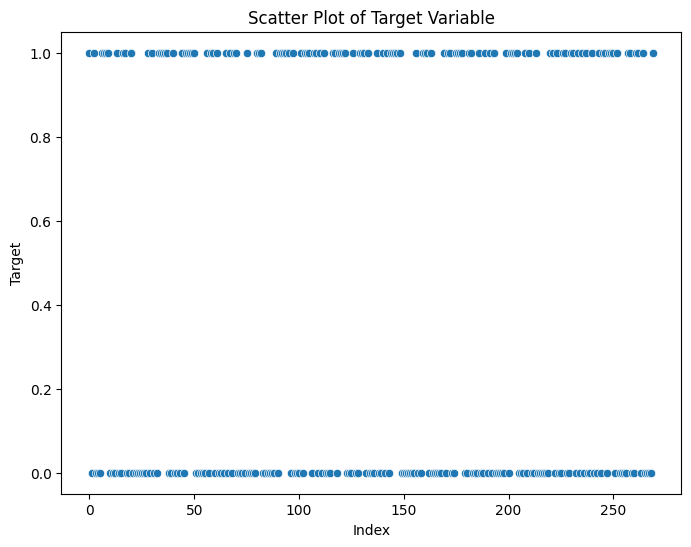

In [16]:
# prompt: create scatter plot of target

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y='target', data=df)
plt.title('Scatter Plot of Target Variable')
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()



---

## Binomial Logistic Regression

In [7]:
# prompt: build a logistic regression model to predict target based on sex

# Fit the logistic regression model
model = smf.logit('target ~ sex', data=df).fit()

# Print the model summary
print(model.summary())

# You can also access specific parts of the model summary like coefficients
print(model.params)

# To make predictions, you can use the model.predict() method
# For example, to predict the probability of target for males (sex=1):
# predictions = model.predict({'sex': 1})

Optimization terminated successfully.
         Current function value: 0.640593
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  270
Model:                          Logit   Df Residuals:                      268
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                 0.06750
Time:                        13:46:24   Log-Likelihood:                -172.96
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 5.618e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2090      0.255     -4.745      0.000      -1.708      -0.710
sex            1.3953      0.

**OBSERVATIONS:**    
LL-Null: Baseline Model Error value
Log-Likelihood:  Current Model Error value - Only a small reduction noticed  
Intercept: -1.209  
Coefficient for sex: 1.395  


In [8]:
# prompt: calculate the odds ratio using the output above

import numpy as np

# Extract the coefficient for 'sex' from the model summary
coefficient_sex = model.params['sex']

# Calculate the odds ratio
odds_ratio = np.exp(coefficient_sex)

print(f"Odds Ratio for sex: {odds_ratio}")

Odds Ratio for sex: 4.036144578313253


**The Odds Ratio for sex is approximately 4.036.**

**Interpretation:**

* **For every one-unit increase in the 'sex' variable**, the odds of the 'target' (heart disease presence) are roughly 4 times higher.
* Since the sex variable is likely coded as 0 and 1 (where 1 could represent male and 0 could represent female), this indicates that males have approximately 4 times higher odds of having heart disease compared to females, holding all other factors constant.


In [9]:
# prompt: What is the probability of target being 1 if sex is 0

# Extract the intercept and coefficient for 'sex'
intercept = model.params['Intercept']
coefficient_sex = model.params['sex']

# Calculate the probability of target being 1 when sex is 0
p = 1 / (1 + np.exp(-(intercept + coefficient_sex * 0)))

print(f"Probability of target being 1 when sex is 0: {p}")

Probability of target being 1 when sex is 0: 0.2298850574712644


In [10]:

# Calculate the probability of target being 1 when sex is 1
p = 1 / (1 + np.exp(-(intercept + coefficient_sex * 1)))

print(f"Probability of target being 1 when sex is 1: {p}")

Probability of target being 1 when sex is 1: 0.5464480874316939




---

## **Multinomial or Multi-Class Logistic Regression:**

Now let us add a second independent variable to our model which is age

In [19]:
# prompt: build a logistic regression prediction model for the target variable

# Fit the logistic regression model with all independent variables
model = smf.logit('target ~ sex + age + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal', data=df).fit()

# Print the model summary
print(model.summary())

# You can access specific parts of the model summary like coefficients
print(model.params)


Optimization terminated successfully.
         Current function value: 0.332589
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  270
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                           13
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.5159
Time:                        14:45:36   Log-Likelihood:                -89.799
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 8.075e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4464      3.088     -2.735      0.006     -14.499      -2.394
sex            1.5421      0.

**OBSERVATIONS:**  
- LL-Likelihood has made remarkable improvement to less than 90.
- Variables that are significant will have a p-value < 0.05.  The significant variables are:


    *   sex
    *   cp
    *   trestbps
    *   ca
    *   thalach
    *   thal

We will retain only the significant variables and rerun the model.



In [33]:
# prompt: build a logistic regression prediction model for target versus sex, cp, trestbps, ca, thalach, thal

# Fit the logistic regression model with selected independent variables
model = smf.logit('target ~ sex + cp + trestbps + ca + thalach + thal', data=df).fit()

# Print the model summary
print(model.summary())

# You can access specific parts of the model summary like coefficients
print(model.params)

# To make predictions, you can use the model.predict() method
# For example, to predict the probability of target for a specific set of features:
# new_data = pd.DataFrame({'sex': [1], 'cp': [2], 'trestbps': [140], 'ca': [0], 'thalach': [160], 'thal': [2]})
# predictions = model.predict(new_data)
# print(predictions)

# Get coefficients from the model
coefficient_sex = model.params['sex']
coefficient_cp = model.params['cp']
coefficient_trestbps = model.params['trestbps']
coefficient_ca = model.params['ca']
coefficient_thalach = model.params['thalach']
coefficient_thal = model.params['thal']

# Calculate odds ratios
odds_ratio_sex = np.exp(coefficient_sex)
odds_ratio_cp = np.exp(coefficient_cp)
odds_ratio_trestbps = np.exp(coefficient_trestbps)
odds_ratio_ca = np.exp(coefficient_ca)
odds_ratio_thalach = np.exp(coefficient_thalach)
odds_ratio_thal = np.exp(coefficient_thal)

print(f"Odds Ratio for sex: {odds_ratio_sex}")
print(f"Odds Ratio for cp: {odds_ratio_cp}")
print(f"Odds Ratio for trestbps: {odds_ratio_trestbps}")
print(f"Odds Ratio for ca: {odds_ratio_ca}")
print(f"Odds Ratio for thalach: {odds_ratio_thalach}")
print(f"Odds Ratio for thal: {odds_ratio_thal}")


Optimization terminated successfully.
         Current function value: 0.376356
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  270
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.4521
Time:                        15:29:18   Log-Likelihood:                -101.62
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 1.365e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1816      2.087     -2.482      0.013      -9.273      -1.090
sex            1.2121      0.

**OBSERVATIONS:**  
- LL value increased marginally to 101.  This is a good trade-off for having reduced the model complexity significanly.
- sex and ca have the highest odds-Ratio
- Based on the p-value all variables are Significant.

## Train and Test Logistic Regression Model

In [26]:
# prompt: Train and test the logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Define X (features/independent variables) and y (target/dependent variable)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the logistic regression model

model = smf.logit('target ~ sex + cp + trestbps + ca + thalach + thal', data=pd.concat([X_train, y_train], axis=1)).fit()  # Rebuild the model with training data

# Print the model summary
print(model.summary())

# Make predictions on the test set, converting probabilities to class labels
y_pred = (model.predict(X_test) >= 0.5).astype(int) # Convert predicted probabilities to 0 or 1

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get coefficients from the model
coefficient_sex = model.params['sex']
coefficient_cp = model.params['cp']
coefficient_trestbps = model.params['trestbps']
coefficient_ca = model.params['ca']
coefficient_thalach = model.params['thalach']
coefficient_thal = model.params['thal']

# Calculate odds ratios
odds_ratio_sex = np.exp(coefficient_sex)
odds_ratio_cp = np.exp(coefficient_cp)
odds_ratio_trestbps = np.exp(coefficient_trestbps)
odds_ratio_ca = np.exp(coefficient_ca)
odds_ratio_thalach = np.exp(coefficient_thalach)
odds_ratio_thal = np.exp(coefficient_thal)

print(f"Odds Ratio for sex: {odds_ratio_sex}")
print(f"Odds Ratio for cp: {odds_ratio_cp}")
print(f"Odds Ratio for trestbps: {odds_ratio_trestbps}")
print(f"Odds Ratio for ca: {odds_ratio_ca}")
print(f"Odds Ratio for thalach: {odds_ratio_thalach}")
print(f"Odds Ratio for thal: {odds_ratio_thal}")


Optimization terminated successfully.
         Current function value: 0.397902
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  202
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.4226
Time:                        14:56:11   Log-Likelihood:                -80.376
converged:                       True   LL-Null:                       -139.21
Covariance Type:            nonrobust   LLR p-value:                 5.020e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6903      2.524     -2.651      0.008     -11.637      -1.743
sex            1.1459      0.

**OBSERVATIONS:**  
- Notice LL has reduced to -80.  Significant improvement.

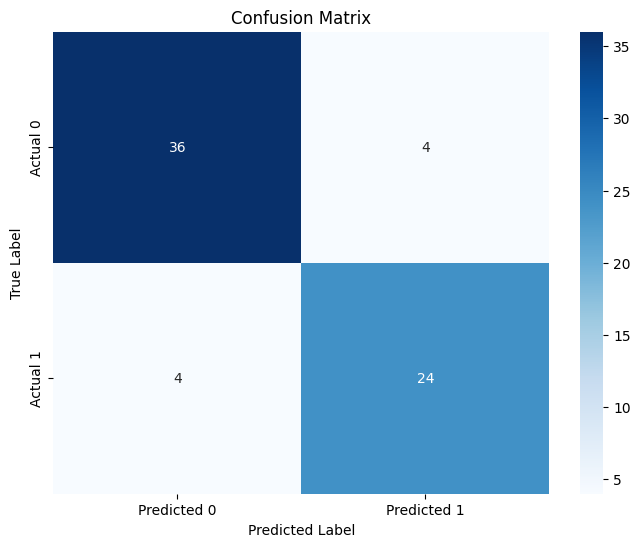

In [27]:
# prompt: create a confusion matrix for the above output

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from your previous code
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
# prompt: Display Accuracy, Precision, Recall and F1 values

# Assuming y_test and y_pred are defined from your previous code
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# You can also get a comprehensive report using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8823529411764706
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1 Score: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.86      0.86      0.86        28

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68



## Optimize Model Performance

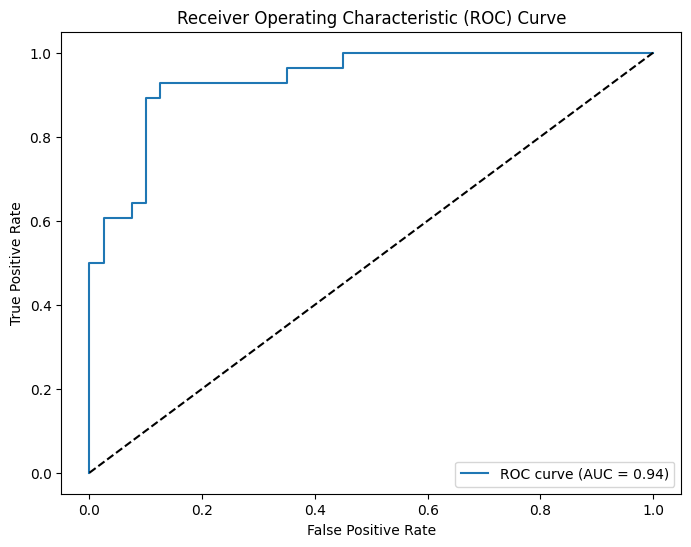

Best Threshold Level: 0.44217647749576255


In [30]:
# prompt: Generate a ROC AUC curve

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_pred are defined from your previous code

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold that maximizes the Youden's J statistic
j_statistic = tpr - fpr
optimal_idx = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_idx]

print(f"Best Threshold Level: {optimal_threshold}")

Accuracy with Optimal Threshold: 0.8970588235294118


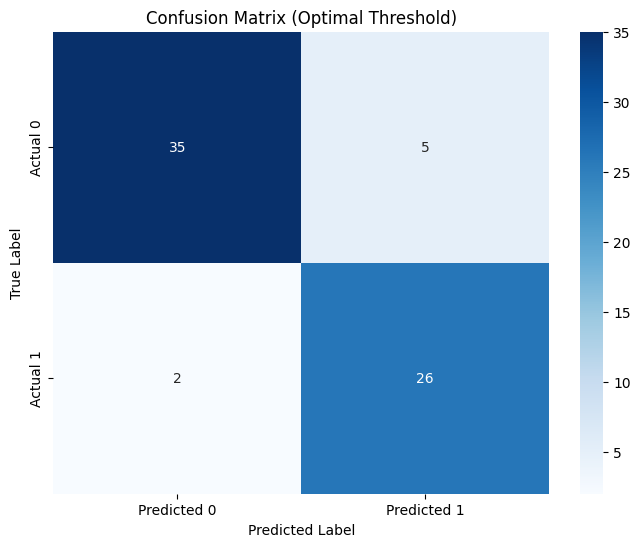

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.84      0.93      0.88        28

    accuracy                           0.90        68
   macro avg       0.89      0.90      0.90        68
weighted avg       0.90      0.90      0.90        68



In [31]:
# prompt: Rebuild the Logistic Regression Model using the Optimal threshold value

# Rebuild the model with the optimal threshold
y_pred_optimal = (model.predict(X_test) >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with Optimal Threshold: {accuracy_optimal}")

# Generate a new confusion matrix with the optimal threshold
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

# Plot the new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Optimal Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# You can further analyze the classification report with the optimal threshold
print(classification_report(y_test, y_pred_optimal))

By changing to Optimal Threshold Level, we are able to improve the Accuracy of the model from 0.8823 to 0.8970 which is a significant improvement.

In [32]:
# prompt: Calculate the Odds Ratio for the model output

# Assuming you have already trained your model and have the coefficients
# Extract the coefficient for 'sex' from the model summary
coefficient_sex = model.params['sex']

# Calculate the odds ratio
odds_ratio = np.exp(coefficient_sex)

print(f"Odds Ratio for sex: {odds_ratio}")

Odds Ratio for sex: 3.1453171237013353


## Use Model to make Predictions for New Data

In [62]:
# prompt: Using the model created above, predict target for a new patient with following parameters: {'sex': [1], 'cp': [0], 'trestbps': [120], 'ca': [0], 'thal': [0]}

new_observation = pd.DataFrame({'sex': [1], 'cp': [0], 'trestbps': [120], 'ca': [0], 'thalach': [0], 'thal': [0]})
predictions = model.predict(new_observation)
print(predictions)

# Convert the predicted probability to a class label (e.g., 0 or 1)
predicted_class = (predictions >= 0.5).astype(int)[0]
print(f"Predicted Class: {predicted_class}")

0    0.085296
dtype: float64
Predicted Class: 0


Changed ca from 0 to 8

In [63]:
new_observation2 = pd.DataFrame({'sex': [1], 'cp': [0], 'trestbps': [120], 'ca': [8], 'thalach': [0], 'thal': [0]})
predictions = model.predict(new_observation2)
print(predictions)

# Convert the predicted probability to a class label (e.g., 0 or 1)
predicted_class = (predictions >= 0.5).astype(int)[0]
print(f"Predicted Class: {predicted_class}")

0    0.99278
dtype: float64
Predicted Class: 1
